In [16]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# read the data
data = pd.read_csv("StressLevelDataset.csv")
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [17]:
# check for missing values
print(data.isnull().sum())

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [18]:
#check the data types
print(data.dtypes)

#check scale of data
data.describe()

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [19]:
# Split data into features and target 
X = data.drop(columns=["stress_level"], axis=1)
y = data["stress_level"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0, stratify=y)

Let's create a pipeline to normalize the data.

In [20]:
#a pipeline to scale the data
pipeline = Pipeline([
  ('scaler', StandardScaler())
])

#transform the training data
X_train_normalized = pipeline.fit_transform(X_train)

#transform the test data
X_test_normalized = pipeline.transform(X_test)

# Lasso Regression Model

Best alpha: 0.01
Best cross-validation score (MSE): 0.16021890947639691
MSE of Lasso Regression on Test Set: 0.10
Overall score on the test set (R^2): 0.86


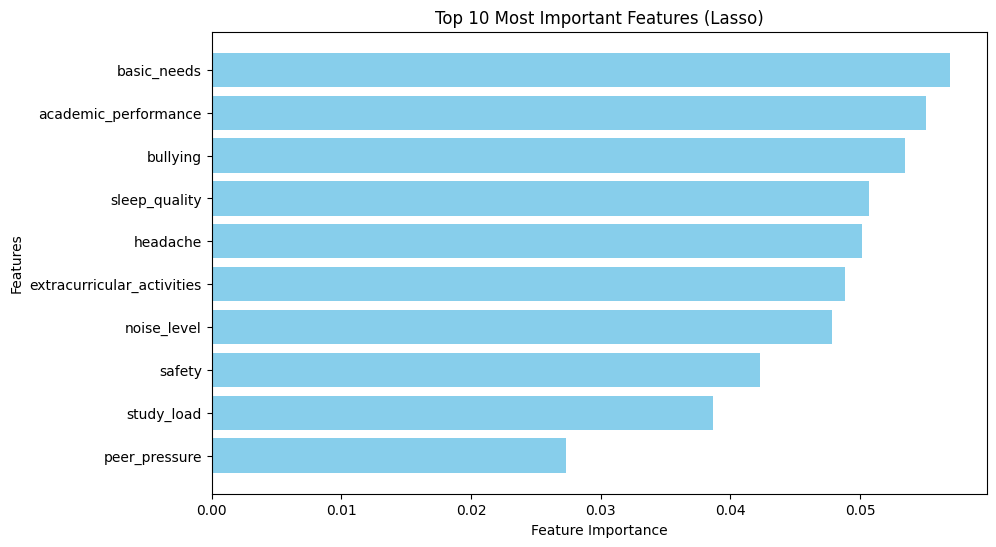

In [21]:
#grid for the alpha parameter, for tuning
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

#initialize lasso model
lasso_model = Lasso()

#perform grid search
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

#print best alpha and best cross-validation score
print("Best alpha:", lasso_grid_search.best_params_['alpha'])
print("Best cross-validation score (MSE):", -lasso_grid_search.best_score_)

#get y_pred
lasso_best_model = lasso_grid_search.best_estimator_
y_pred_lasso = lasso_best_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("MSE of Lasso Regression on Test Set: {:.2f}".format(mse_lasso))

#score the lasso model
test_set_score_lasso = lasso_best_model.score(X_test, y_test)
print("Overall score on the test set (R^2): {:.2f}".format(test_set_score_lasso))

#let us also plot feature importance
feature_importance = np.abs(lasso_best_model.coef_)
feature_names = X.columns

#sort by most important
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

#plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:10], sorted_feature_importance[:10], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features (Lasso)")
plt.gca().invert_yaxis()
plt.show()


Let's check to see if a Linear Regression using scaled data will perform better. 

# Lasso Regression with Scaled Data

Best alpha (scaled): 0.01
Best cross-validation score (MSE, scaled): 0.1594470248428086
MSE of Lasso Regression on Scaled Test Set: 0.09
Overall score on the scaled test set (R^2, Lasso): 0.86


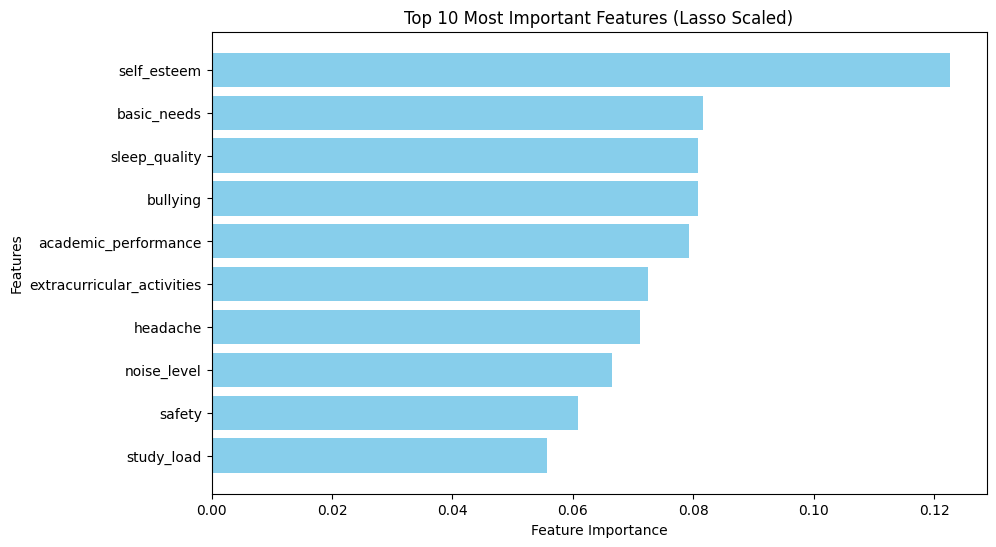

In [22]:
#grid for the alpha parameter, for tuning
lasso_param_grid_scaled = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

#initialize lasso model
lasso_model_scaled = Lasso()

#perform grid search
lasso_grid_search_scaled = GridSearchCV(lasso_model_scaled, lasso_param_grid_scaled, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search_scaled.fit(X_train_normalized, y_train)

#print best alpha and best cross-validation score
print("Best alpha (scaled):", lasso_grid_search_scaled.best_params_['alpha'])
print("Best cross-validation score (MSE, scaled):", -lasso_grid_search_scaled.best_score_)

#get y_pred
lasso_best_model_scaled = lasso_grid_search_scaled.best_estimator_
y_pred_scaled_lasso = lasso_best_model_scaled.predict(X_test_normalized)
mse_scaled_lasso = mean_squared_error(y_test, y_pred_scaled_lasso)
print("MSE of Lasso Regression on Scaled Test Set: {:.2f}".format(mse_scaled_lasso))

#score the lasso model
test_set_score_scaled_lasso = lasso_best_model_scaled.score(X_test_normalized, y_test)
print("Overall score on the scaled test set (R^2, Lasso): {:.2f}".format(test_set_score_scaled_lasso))

#let us also plot feature importance
feature_importance = np.abs(lasso_best_model_scaled.coef_)
feature_names = X.columns

#sort by most important
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

#plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:10], sorted_feature_importance[:10], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features (Lasso Scaled)")
plt.gca().invert_yaxis()
plt.show()


# Gradient Boosting Regressor Model

In [23]:
# Create param grid for gradient boosting model
GradientBoostedGridParam = [
    {
        "n_estimators": [5, 10, 25, 50],  # Number of trees
        "max_depth": [3, 4, 5, 6, 7],  # Max depth of trees
        "learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5],  # Learning rate
    }
]

# Initialize the grid search for the gradient boosting model
gradientBoostedGrid = GridSearchCV(GradientBoostingRegressor(random_state=0), GradientBoostedGridParam, cv=5, return_train_score=True)


In [24]:
# Fit the model to the training data
gradientBoostedGrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                          'max_depth': [3, 4, 5, 6, 7],
                          'n_estimators': [5, 10, 25, 50]}],
             return_train_score=True)

Best params:
{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 10}

Best cross-validation train score: 0.92
Best cross-validation test score: 0.77
Test-set score: 0.83
Mean Squared Error: 0.11


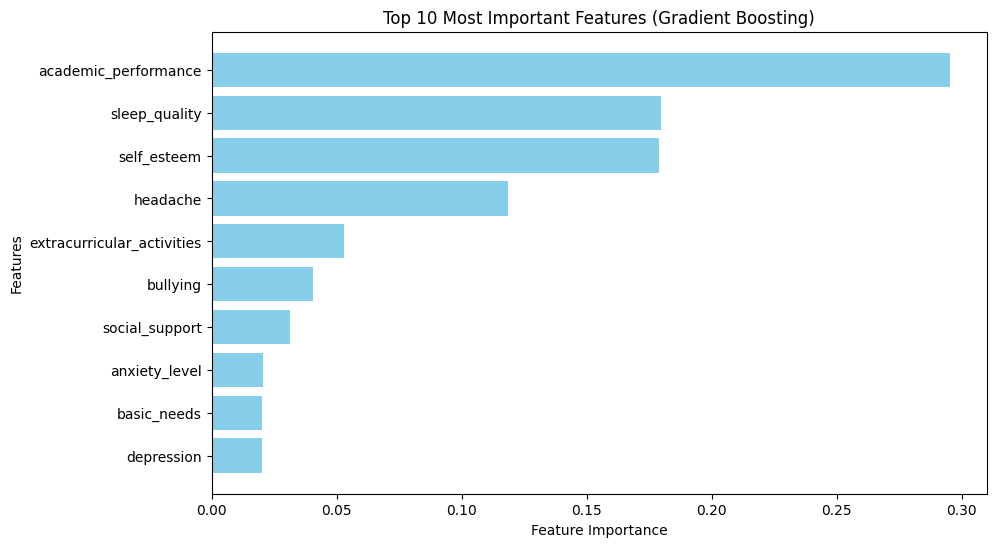

In [25]:
# Display the best parameters and scores
print("Best params:\n{}\n".format(gradientBoostedGrid.best_params_))
print("Best cross-validation train score: {:.2f}".format(gradientBoostedGrid.cv_results_['mean_train_score'][gradientBoostedGrid.best_index_]))
print("Best cross-validation test score: {:.2f}".format(gradientBoostedGrid.best_score_))
print("Test-set score: {:.2f}".format(gradientBoostedGrid.score(X_test, y_test)))

# Print the mean squared error
y_pred = gradientBoostedGrid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# get the feature importance
feature_importance = gradientBoostedGrid.best_estimator_.feature_importances_
feature_names = X.columns

# sort by most important
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

#plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:10], sorted_feature_importance[:10], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.show()

The model's performance is generally strong, as reflected by the results. It performed best with a learning rate of 0.3, a max tree depth of 3, and 10 estimators in the ensemble. The gradient boosting regressor achieved a train score of 0.92 and a test score of 0.77 during cross-validation, indicating some overfitting, as the model performed better on the training data than on the test data. However, the model achieved a solid test-set score of 0.83, showing that it generalizes well to unseen data. Additionally, the model had a mean squared error of 0.11, demonstrating that the predictions are very close to the actual values.

# Random Forest Model

In [26]:
# create an array with parameters for our Random Forest

randomForestGridParam = [
    {
        "n_estimators": [5, 10, 25, 50, 100],  # Number of trees
        "max_depth": [3, 5, 7, 9, 11],  # Max depth of trees
    }
]

# create a grid search object with the random forest model and the parameter grid
randomForestGrid = GridSearchCV(RandomForestRegressor(random_state=0), randomForestGridParam, cv=5, return_train_score=True)

In [27]:
# fit the grid with the training data
randomForestGrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid=[{'max_depth': [3, 5, 7, 9, 11],
                          'n_estimators': [5, 10, 25, 50, 100]}],
             return_train_score=True)

Best params:
{'max_depth': 5, 'n_estimators': 50}

Best cross-validation train score: 0.93
Best cross-validation test score: 0.79
Test-set score: 0.87
Mean Squared Error: 0.09


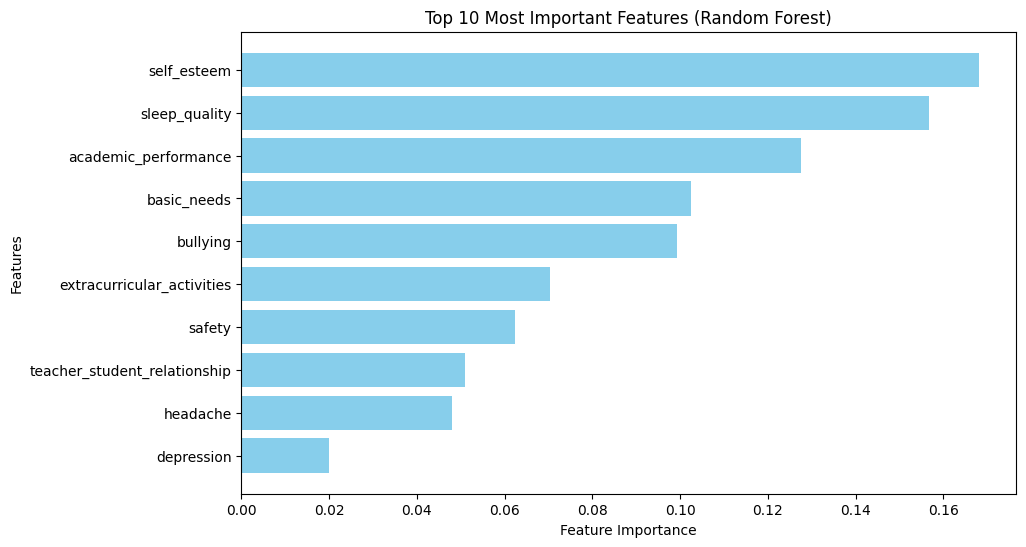

In [28]:
# print out the best parameters and scores
print("Best params:\n{}\n".format(randomForestGrid.best_params_))
print("Best cross-validation train score: {:.2f}".format(randomForestGrid.cv_results_['mean_train_score'][randomForestGrid.best_index_]))
print("Best cross-validation test score: {:.2f}".format(randomForestGrid.best_score_))
print("Test-set score: {:.2f}".format(randomForestGrid.score(X_test, y_test)))

# get the predictions and calculate the mean squared error
y_pred = randomForestGrid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# get the feature importance
feature_importance = randomForestGrid.best_estimator_.feature_importances_
feature_names = X.columns

# sort by most important
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

#plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:10], sorted_feature_importance[:10], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

Model gives a pretty high training score, decent validation score, and pretty good test score, with a mean square error of 0.09. 
The high training score could be a sign of overfitting, but getting a test score of 87% on values it seen is still very good on data it hasn't seen before. Moreover, with a mean square error of only 0.09, and our outputs ranging from 0-2, on average we are actually pretty close to what the expected stress level should be.

# Summary of Results

## Ranking and Evaluation on Performance

### Ranking Criteria
We want a model that has a low MSE, but with a high R^2 score.

### Model Performance
1. Random Forest Regressor
    - Best parameters: {max_depth: 5, n_estimators: 50}
    - Test set R^2 score: 0.87
    - Mean Squared Error: 0.09

2. Lasso Regression With Scaled Data
    - Best parameters: {alpha: 0.01}
    - Test set R^2 score: 0.86
    - Mean Squared Error: 0.09

3. Lasso Regression with Non-Scaled Data
    - Best parameters: {alpha: 0.01}
    - Test set R^2 score: 0.86
    - Mean Squared Error: 0.10

4. Gradient Boosting Regressor
    - Best parameters: {learning_rate: 0.3, max_depth: 3, n_estimators: 10}
    - Test set R^2 score: 0.83
    - Mean Squared Error: 0.11

### Conclusion
The random forest regressor model performed the best, then the lasso regressor with scaled data, the lasso regressor with non-scaled data, and finally the gradient boosting regressor. Overall, all models performed well, with R² scores ranging from 0.83 to 0.87 and MSEs between 0.09 and 0.11, suggesting that the models were able to predict values that were within 15% of the actual values because the average of the stress level values was about 1. Additionally, the high R² scores indicates that the models are able to explain a large portion of the variance in stress levels based on the given features.

### What does the mean for the client?
By using the models trained, the Wellness Center at the University of Calgary can accurately predict and evaluate the stress levels of students based on various contributing factors, such as anxiety levels, self-esteem, mental health history, study load, sleep quality, and more. The analysis indicates that self-esteem, sleep quality, and academic performance are among the most significant contributors to stress. With this information, advisors at the Wellness Center can prioritize addressing these key areas to better support students.

Having the ability to predict stress levels in students is crucial for addressing a prevelant issue that affects not only university students but also high school students. The academic pressures and personal challenges can negatively impact a student's mental and physical well-being. By examining the relationship between factors such as self esteem, study load, sleep quality, and more, the center can better understand the stress inducing factors affecting individual students, enabling better support strategies. These support strategies will aim to improve a student's mental and physical well-being and help facilitate academic sucess. 
